<a href="https://colab.research.google.com/github/Ajay2597/6220/blob/main/INSE_6220_KidneyStone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/Ajay2597/6220/main/kidney-stone-dataset(1).csv')
df.head(25)

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0
5,5,1.020,5.27,668,25.3,252,3.34,0
6,6,1.012,5.62,461,17.4,195,1.40,0
7,7,1.029,5.67,1107,35.9,550,8.48,0
8,8,1.015,5.41,543,21.9,170,1.16,0
9,9,1.021,6.13,779,25.7,382,2.21,0


In [19]:
len(df.index)

90

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [21]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [22]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


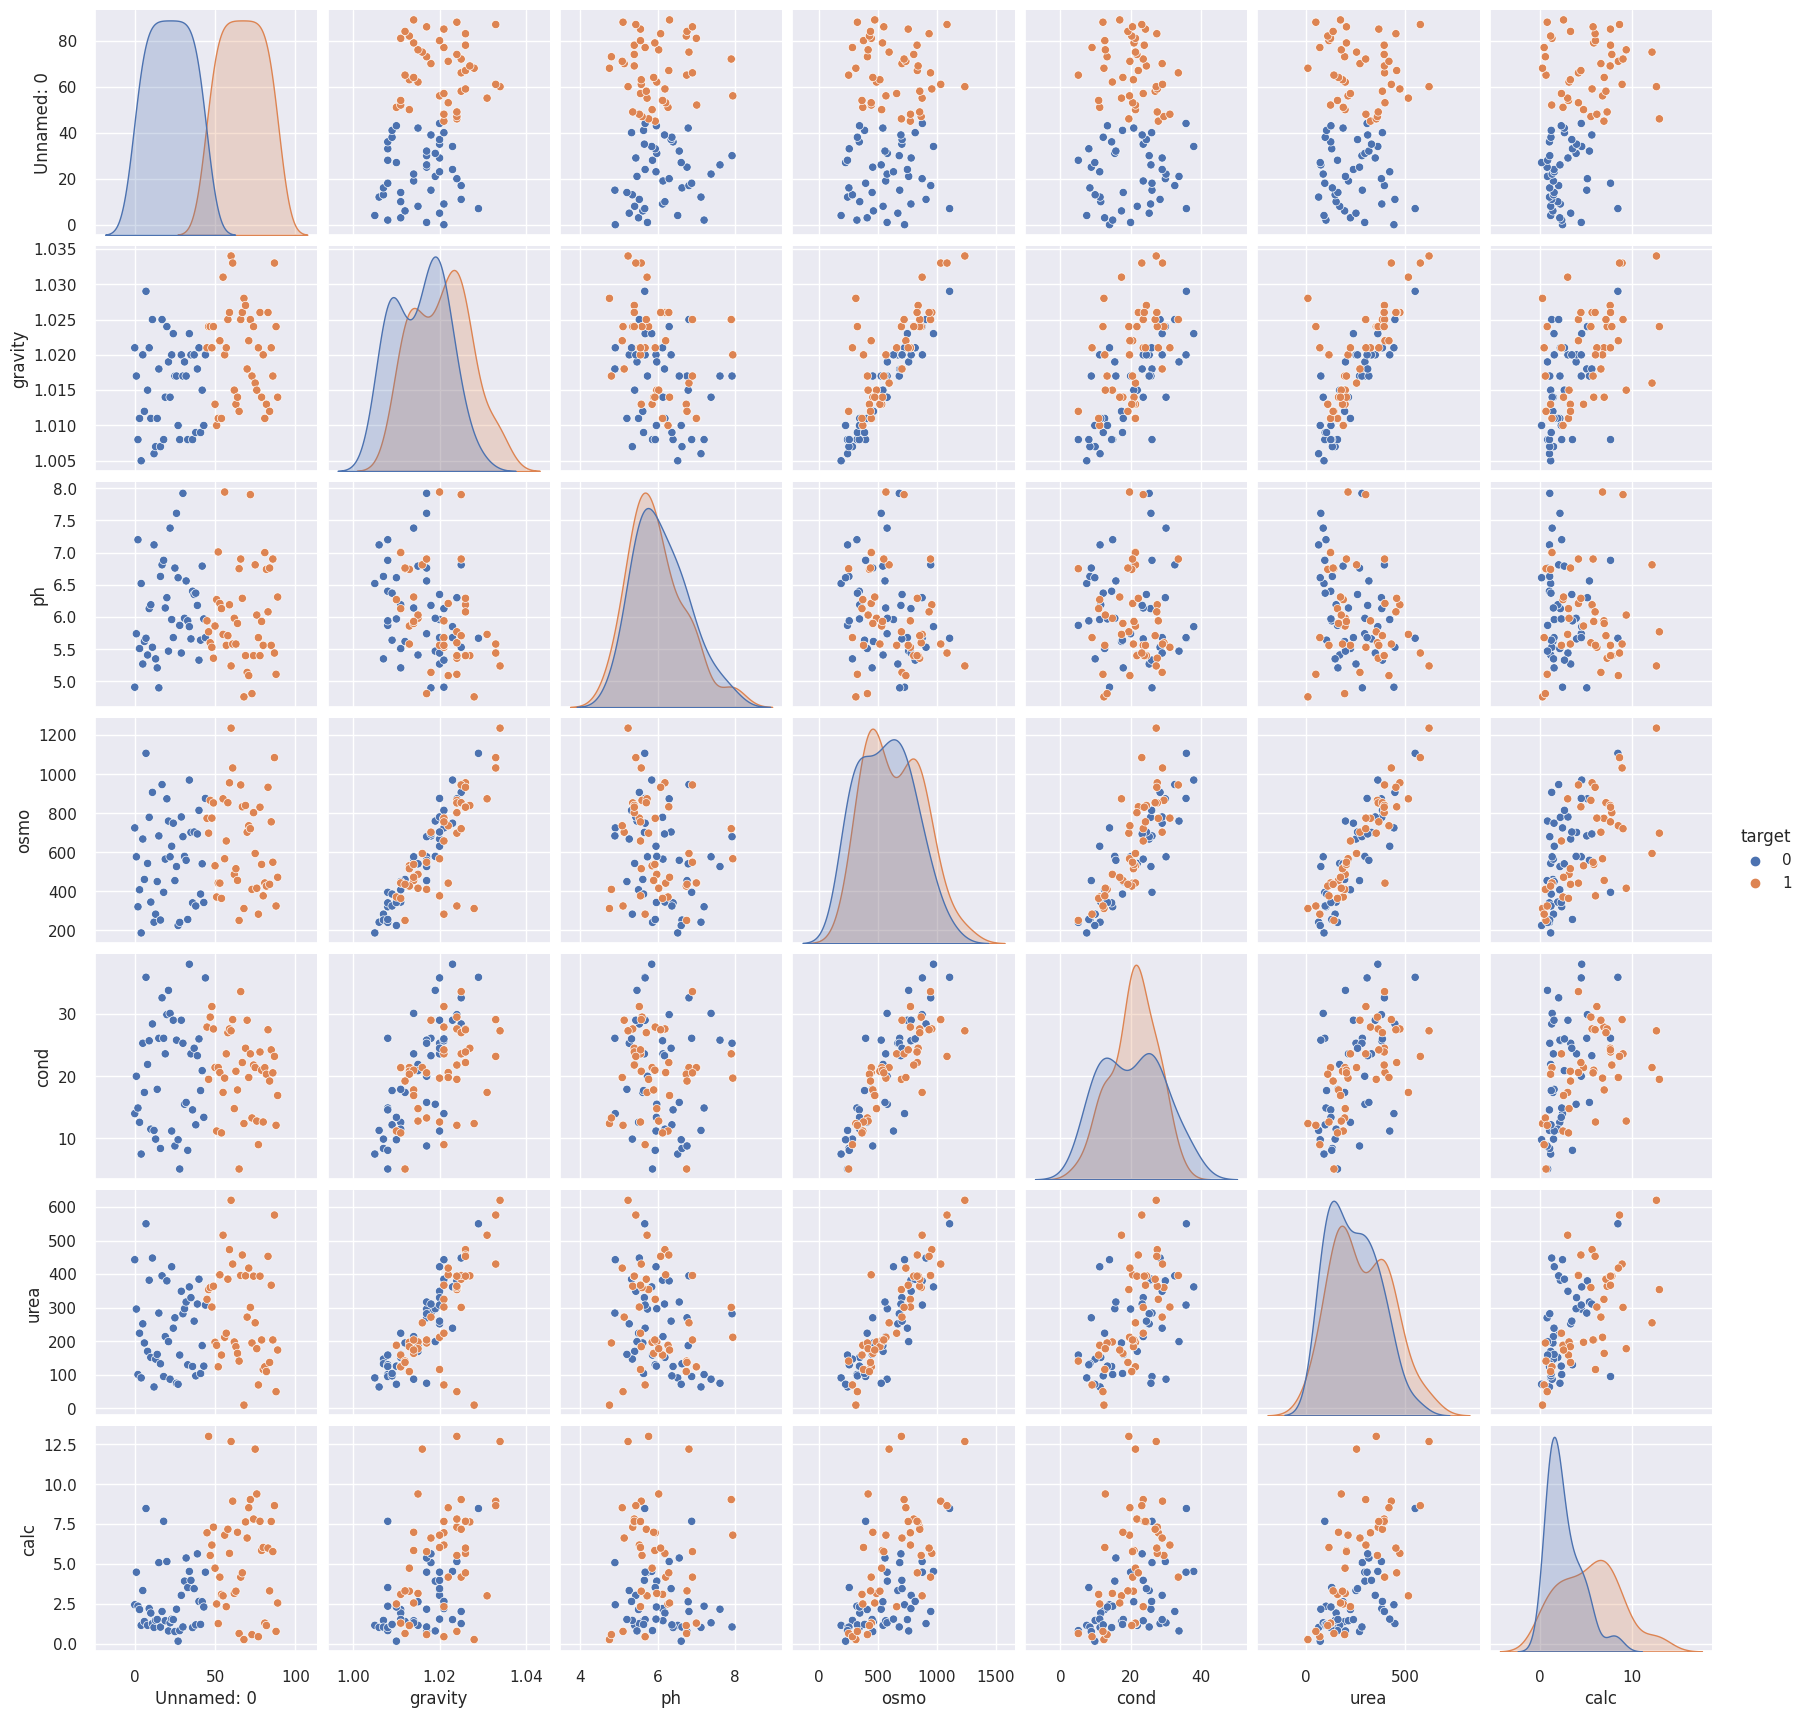

In [23]:
sns.pairplot(df, hue='target')
plt.show()

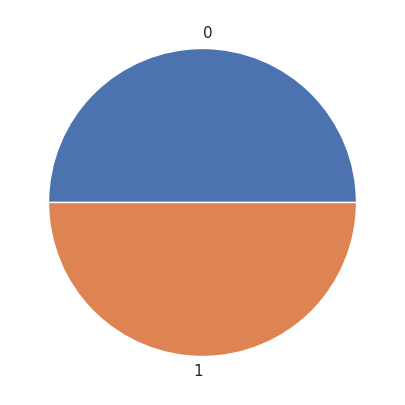

In [24]:
y =df['target']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [25]:
X = df.drop(columns=['target'])
X.head(10)

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc
0,0,1.021,4.91,725,14.0,443,2.45
1,1,1.017,5.74,577,20.0,296,4.49
2,2,1.008,7.20,321,14.9,101,2.36
3,3,1.011,5.51,408,12.6,224,2.15
4,4,1.005,6.52,187,7.5,91,1.16
5,5,1.020,5.27,668,25.3,252,3.34
6,6,1.012,5.62,461,17.4,195,1.40
7,7,1.029,5.67,1107,35.9,550,8.48
8,8,1.015,5.41,543,21.9,170,1.16
9,9,1.021,6.13,779,25.7,382,2.21


In [26]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,90.0,44.500000,26.124701,0.000,22.25000,44.500,66.7500,89.000
gravity,90.0,1.017967,0.006783,1.005,1.01225,1.018,1.0230,1.034
ph,90.0,6.036444,0.711691,4.760,5.53750,5.935,6.4900,7.940
osmo,90.0,602.333333,238.459805,187.000,411.50000,572.000,778.0000,1236.000
cond,90.0,20.621667,7.654533,5.100,14.15000,21.175,26.0750,38.000
urea,90.0,258.200000,135.381127,10.000,148.25000,231.500,366.2500,620.000
calc,90.0,4.017778,3.016139,0.170,1.41250,3.230,5.9625,13.000


In [27]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc
0,-1.712912,0.449697,-1.591639,0.517294,-0.869911,1.372682,-0.522708
1,-1.674419,-0.143310,-0.418869,-0.106833,-0.081670,0.280776,0.157442
2,-1.635927,-1.477575,1.644076,-1.186403,-0.751675,-1.167671,-0.552715
3,-1.597434,-1.032820,-0.743853,-0.819518,-1.053834,-0.254035,-0.622730
4,-1.558942,-1.922330,0.683252,-1.751491,-1.723838,-1.241951,-0.952804
5,-1.520450,0.301445,-1.082968,0.276921,0.614609,-0.046053,-0.225976
6,-1.481957,-0.884568,-0.588426,-0.596013,-0.423241,-0.469446,-0.872786
7,-1.443465,1.635710,-0.517777,2.128216,2.007167,2.167472,1.487737
8,-1.404972,-0.439813,-0.885151,-0.250213,0.167939,-0.655144,-0.952804
9,-1.366480,0.449697,0.132192,0.745016,0.667158,0.919578,-0.602726


In [28]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,90.0,1.480297e-17,1.005602,-1.712912,-0.856456,0.000000,0.856456,1.712912
gravity,90.0,2.375877e-14,1.005602,-1.922330,-0.847505,0.004942,0.746200,2.376968
ph,90.0,2.723130e-15,1.005602,-1.803585,-0.704997,-0.143339,0.640863,2.689678
osmo,90.0,-1.813364e-16,1.005602,-1.751491,-0.804758,-0.127918,0.740799,2.672218
cond,90.0,5.551115e-17,1.005602,-2.039135,-0.850205,0.072693,0.716423,2.283051
urea,90.0,1.097887e-16,1.005602,-1.843614,-0.816702,-0.198326,0.802588,2.687427
calc,90.0,2.535009e-16,1.005602,-1.282877,-0.868618,-0.262651,0.648384,2.994737


In [29]:
observations = list(df.index)
variables = list(df.columns)

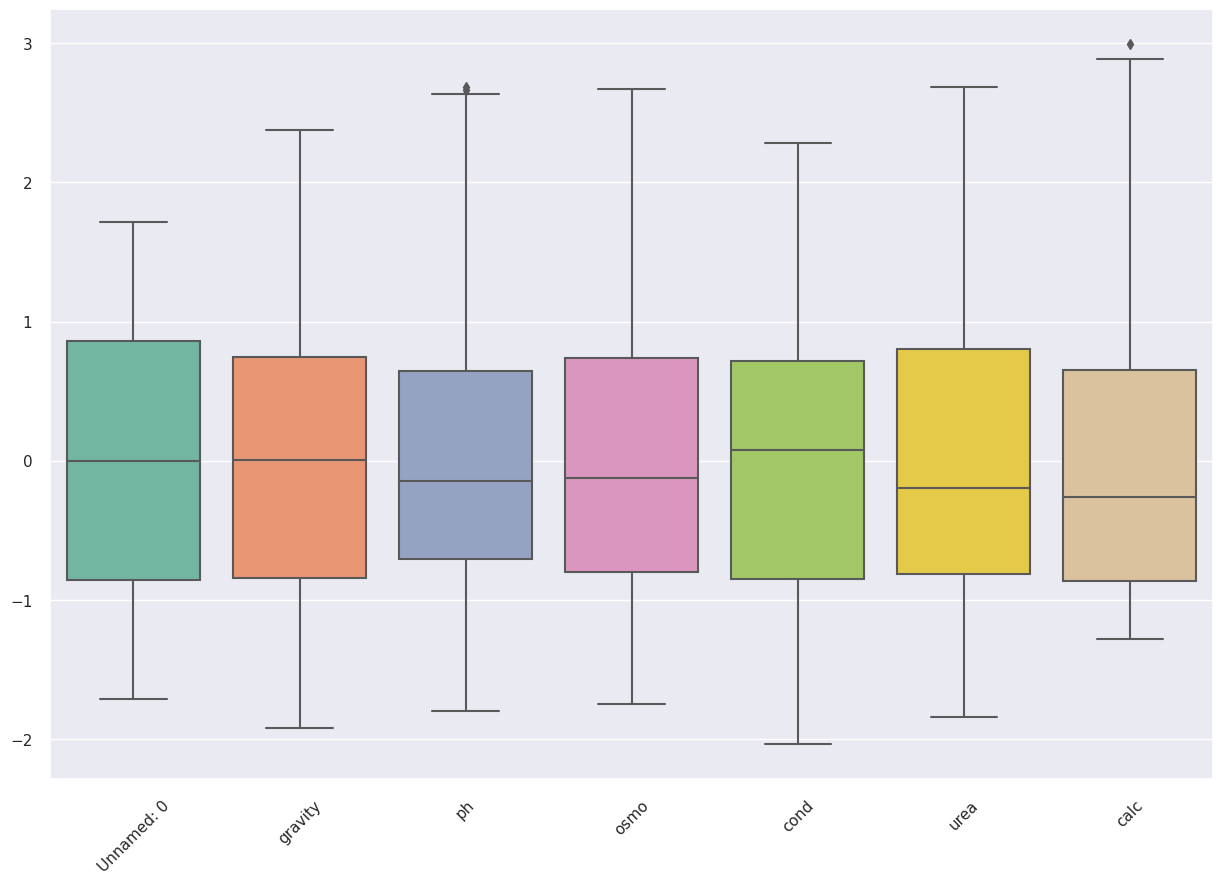

In [30]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

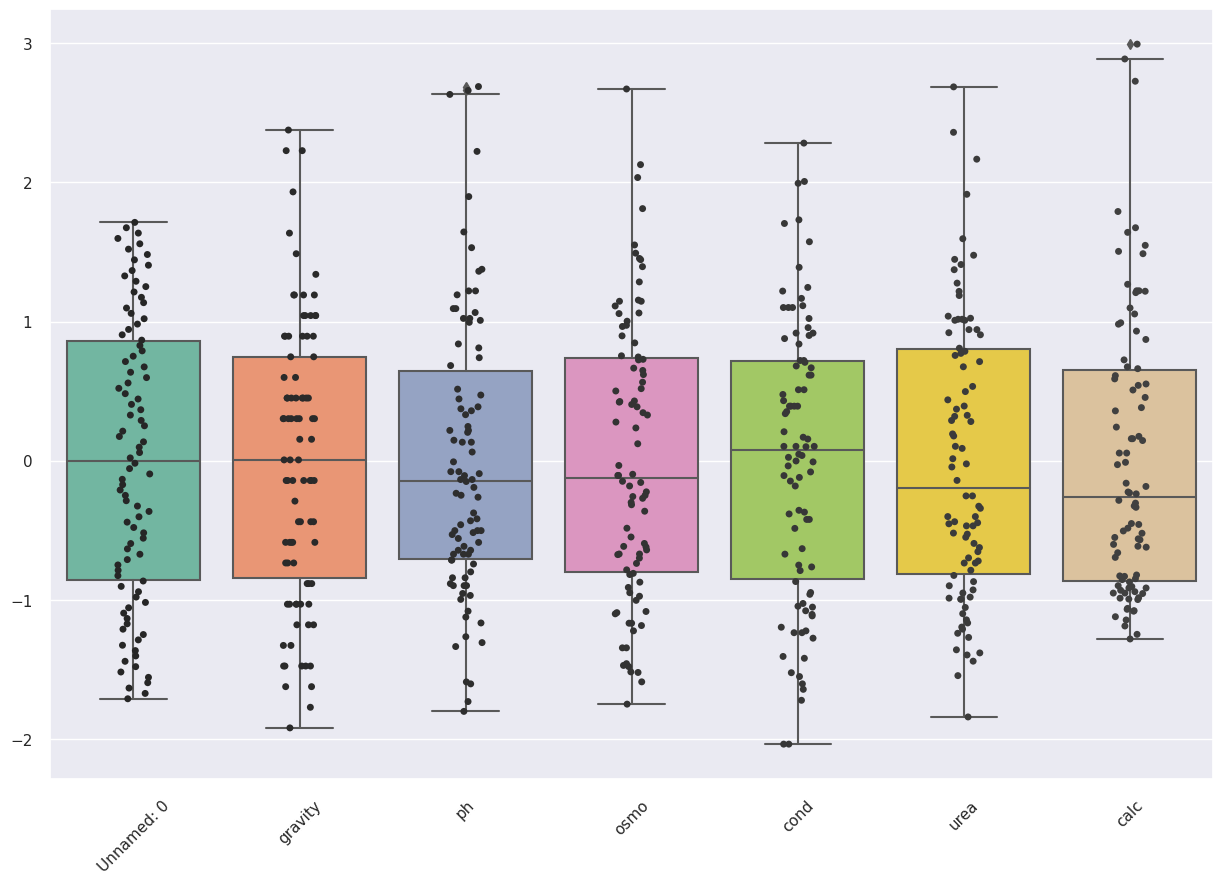

In [31]:
ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

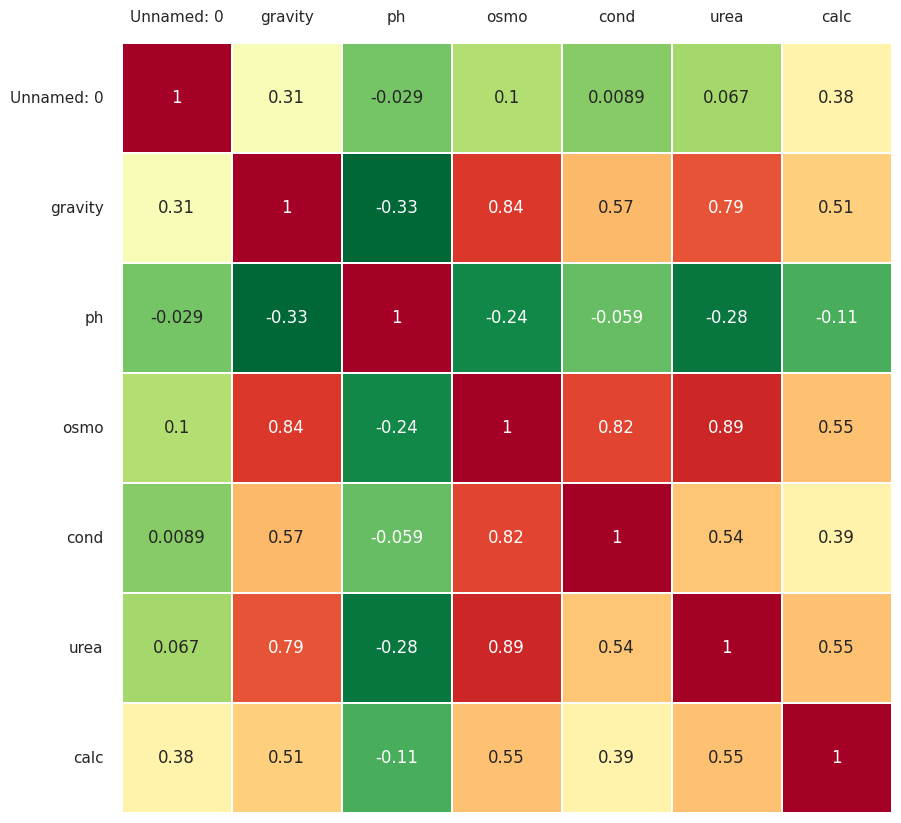

In [32]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, 'Z2')

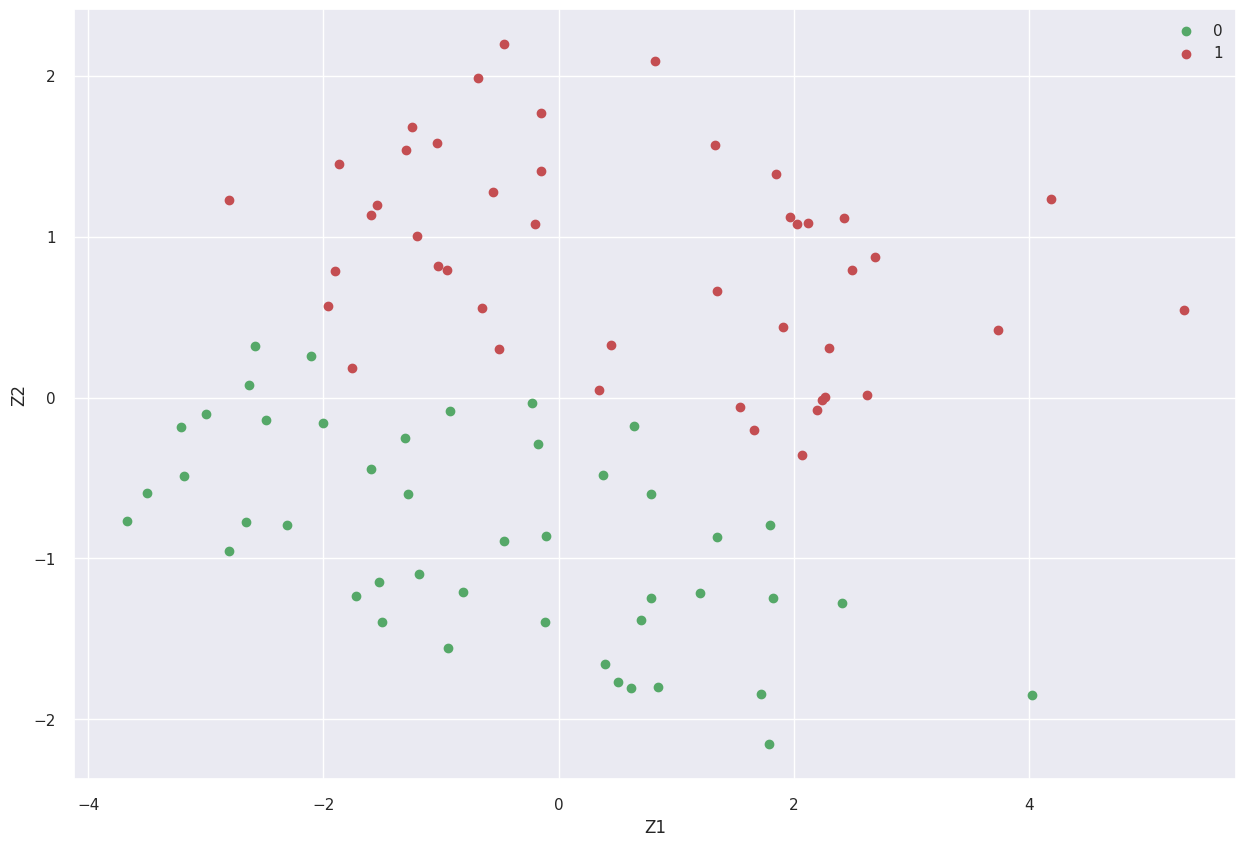

In [33]:
pca = PCA()
Z = pca.fit_transform(X)


idx_0= np.where(y == 0)
idx_1 = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

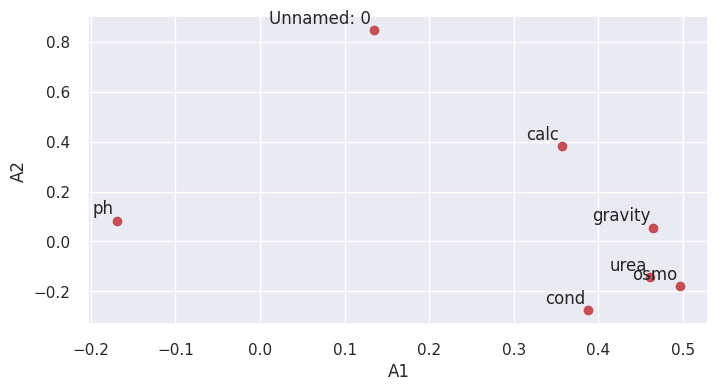

In [34]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

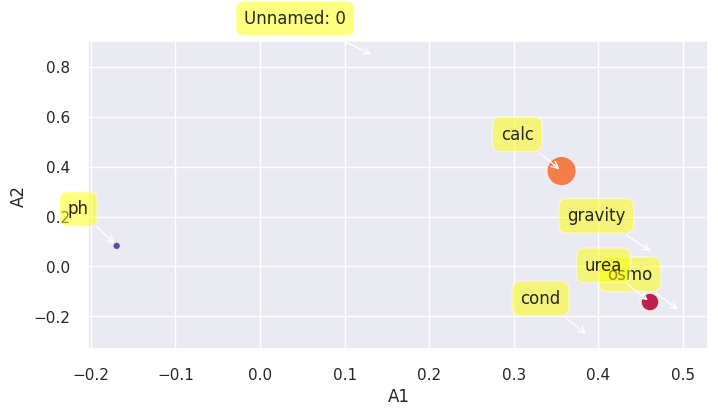

In [35]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

array([3.80615937, 1.16729771, 0.99863687, 0.51674473, 0.41565728,
       0.15431628, 0.01983945])

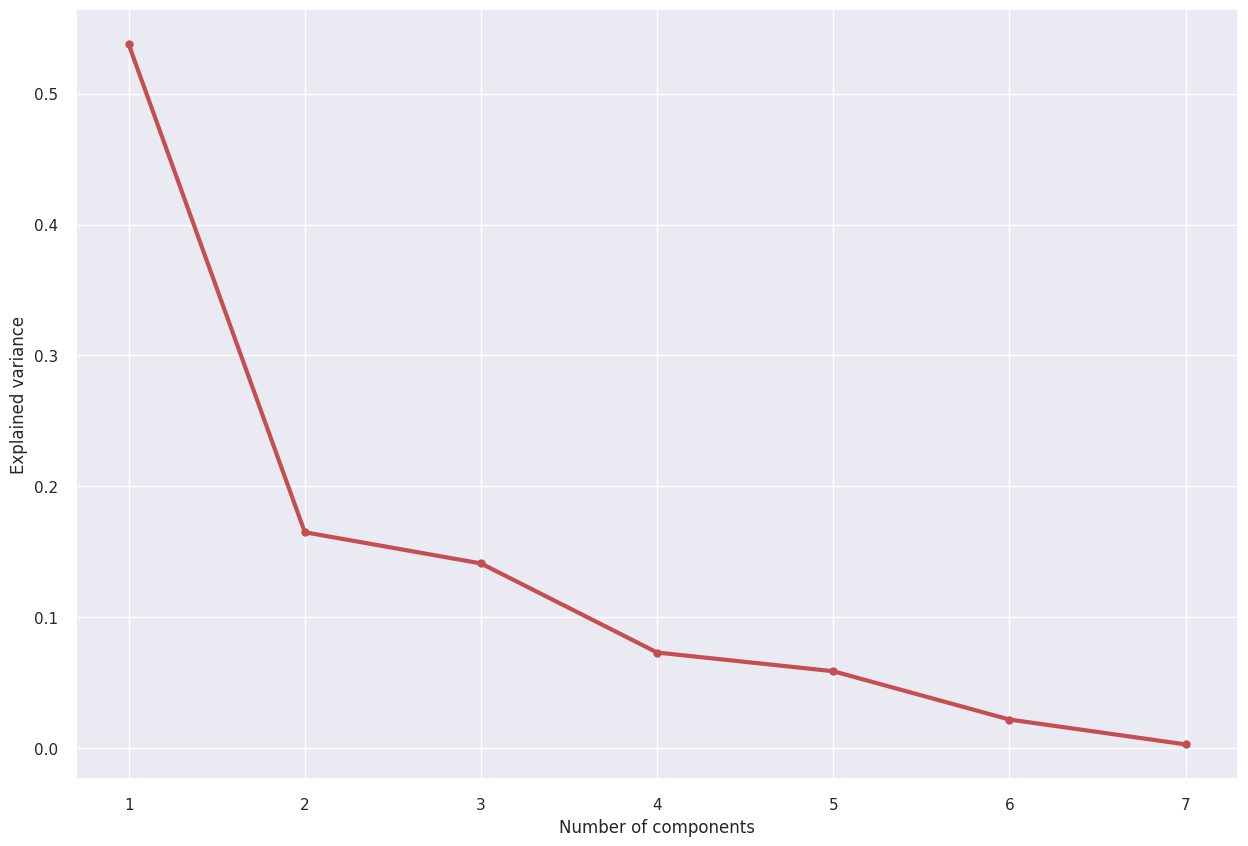

In [36]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

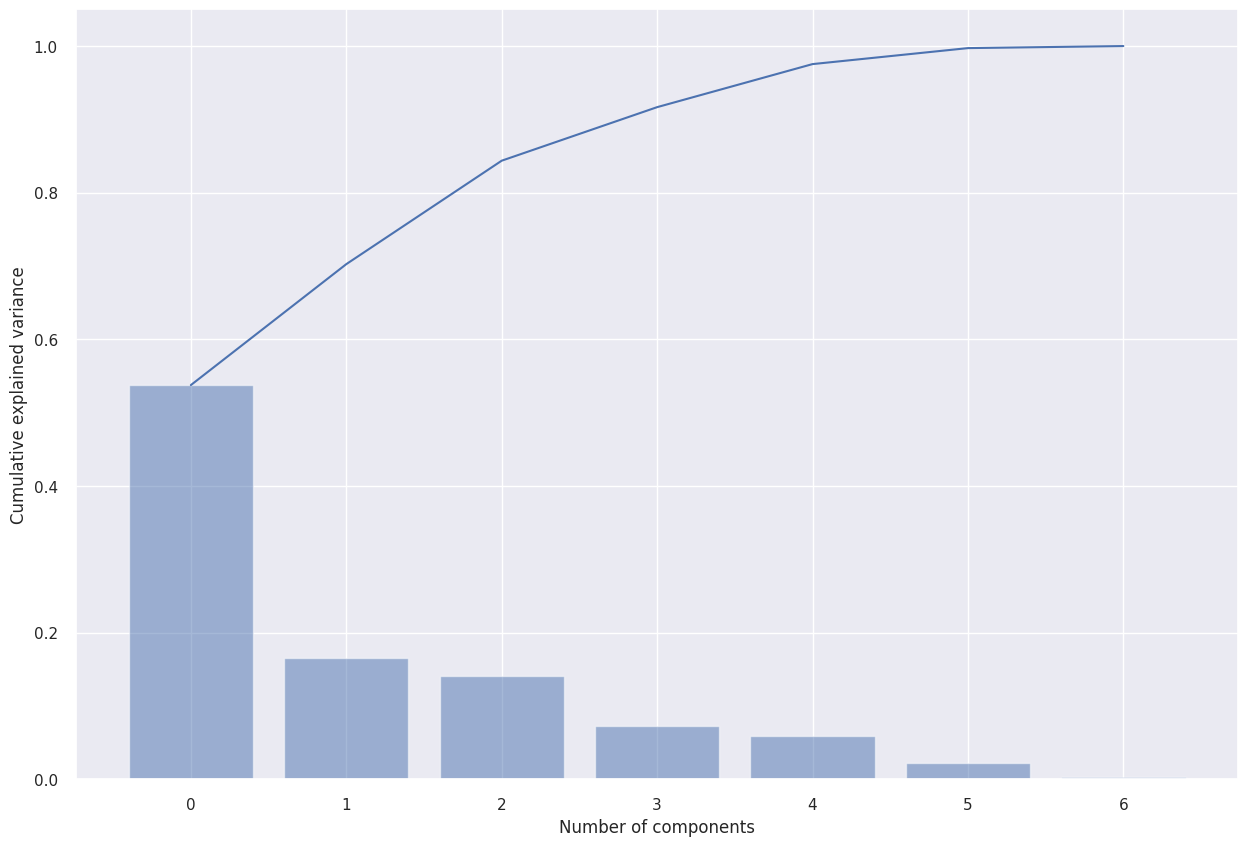

In [37]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([-1.80284329, -1.39695766, -0.95470577, -1.23355759, -0.76597839,
       -1.6576722 , -1.39388995, -1.8491215 , -1.55783997, -1.79919552,
       -0.79072404, -2.15537849, -0.59480996, -0.77214972, -1.14659513,
       -1.24367643, -0.48706318, -1.84061558, -0.24930121, -1.210983  ,
       -1.24276733, -1.76575899, -1.09584322, -0.85989438, -1.38021429,
       -0.44461507, -0.59937826, -0.18377681, -0.10338802, -1.21714956,
       -0.8912502 , -0.286409  , -0.03504996,  0.32208498, -1.27390723,
       -0.60066698, -0.14125701, -0.48139965,  0.07914255, -0.17774041,
       -0.86691719, -0.15744201, -0.08190861,  0.25836455, -0.79110664,
       -0.05969992,  1.07874772, -0.35502022, -0.20403638, -0.01778725,
        0.30020503,  0.57095422,  0.18442759,  0.32397533,  0.7839185 ,
       -0.07651255,  1.07754581,  0.04755477,  0.30636488,  0.01860237,
        0.54330614,  0.4206748 ,  0.79171275,  0.55426775,  1.27778492,
        1.22512232,  0.00322687,  0.44099799,  1.00199736,  0.79

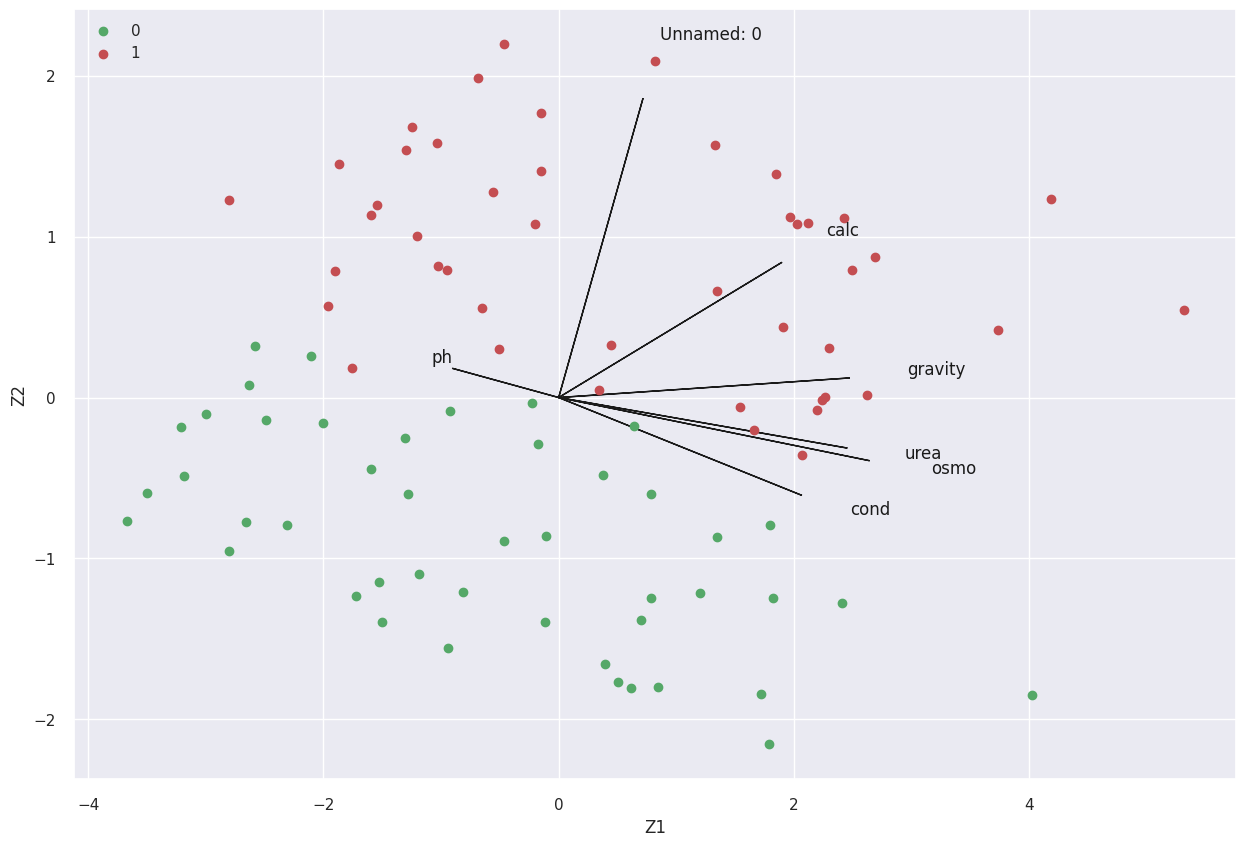

In [38]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')

plt.legend(loc='upper left')
Z1
Z2
   

In [39]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [41]:
out['PC']

,PC1,PC2,PC3,PC4,PC5
0,0.613651,-1.802843,-1.851663,0.792467,1.064327
1,-0.120405,-1.396958,-0.376139,0.961955,-0.055873
2,-2.802189,-0.954706,1.299241,0.820831,0.038244
3,-1.724557,-1.233558,-1.059761,0.875450,0.081154
4,-3.670789,-0.765978,0.026633,0.983665,0.227525
...,...,...,...,...,...
85,1.846176,1.390711,-0.347695,0.055780,-0.366135
86,-0.149694,1.768533,1.178646,-0.247912,-0.065978
87,4.181157,1.234942,-0.618950,0.104879,1.037699
88,-1.249377,1.683965,-1.884332,-1.591212,0.151273


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '5 Principal Components explain [99.71%] of the variance'}, xlabel='PC1 (53.7% expl.var)', ylabel='PC2 (16.4% expl.var)'>)

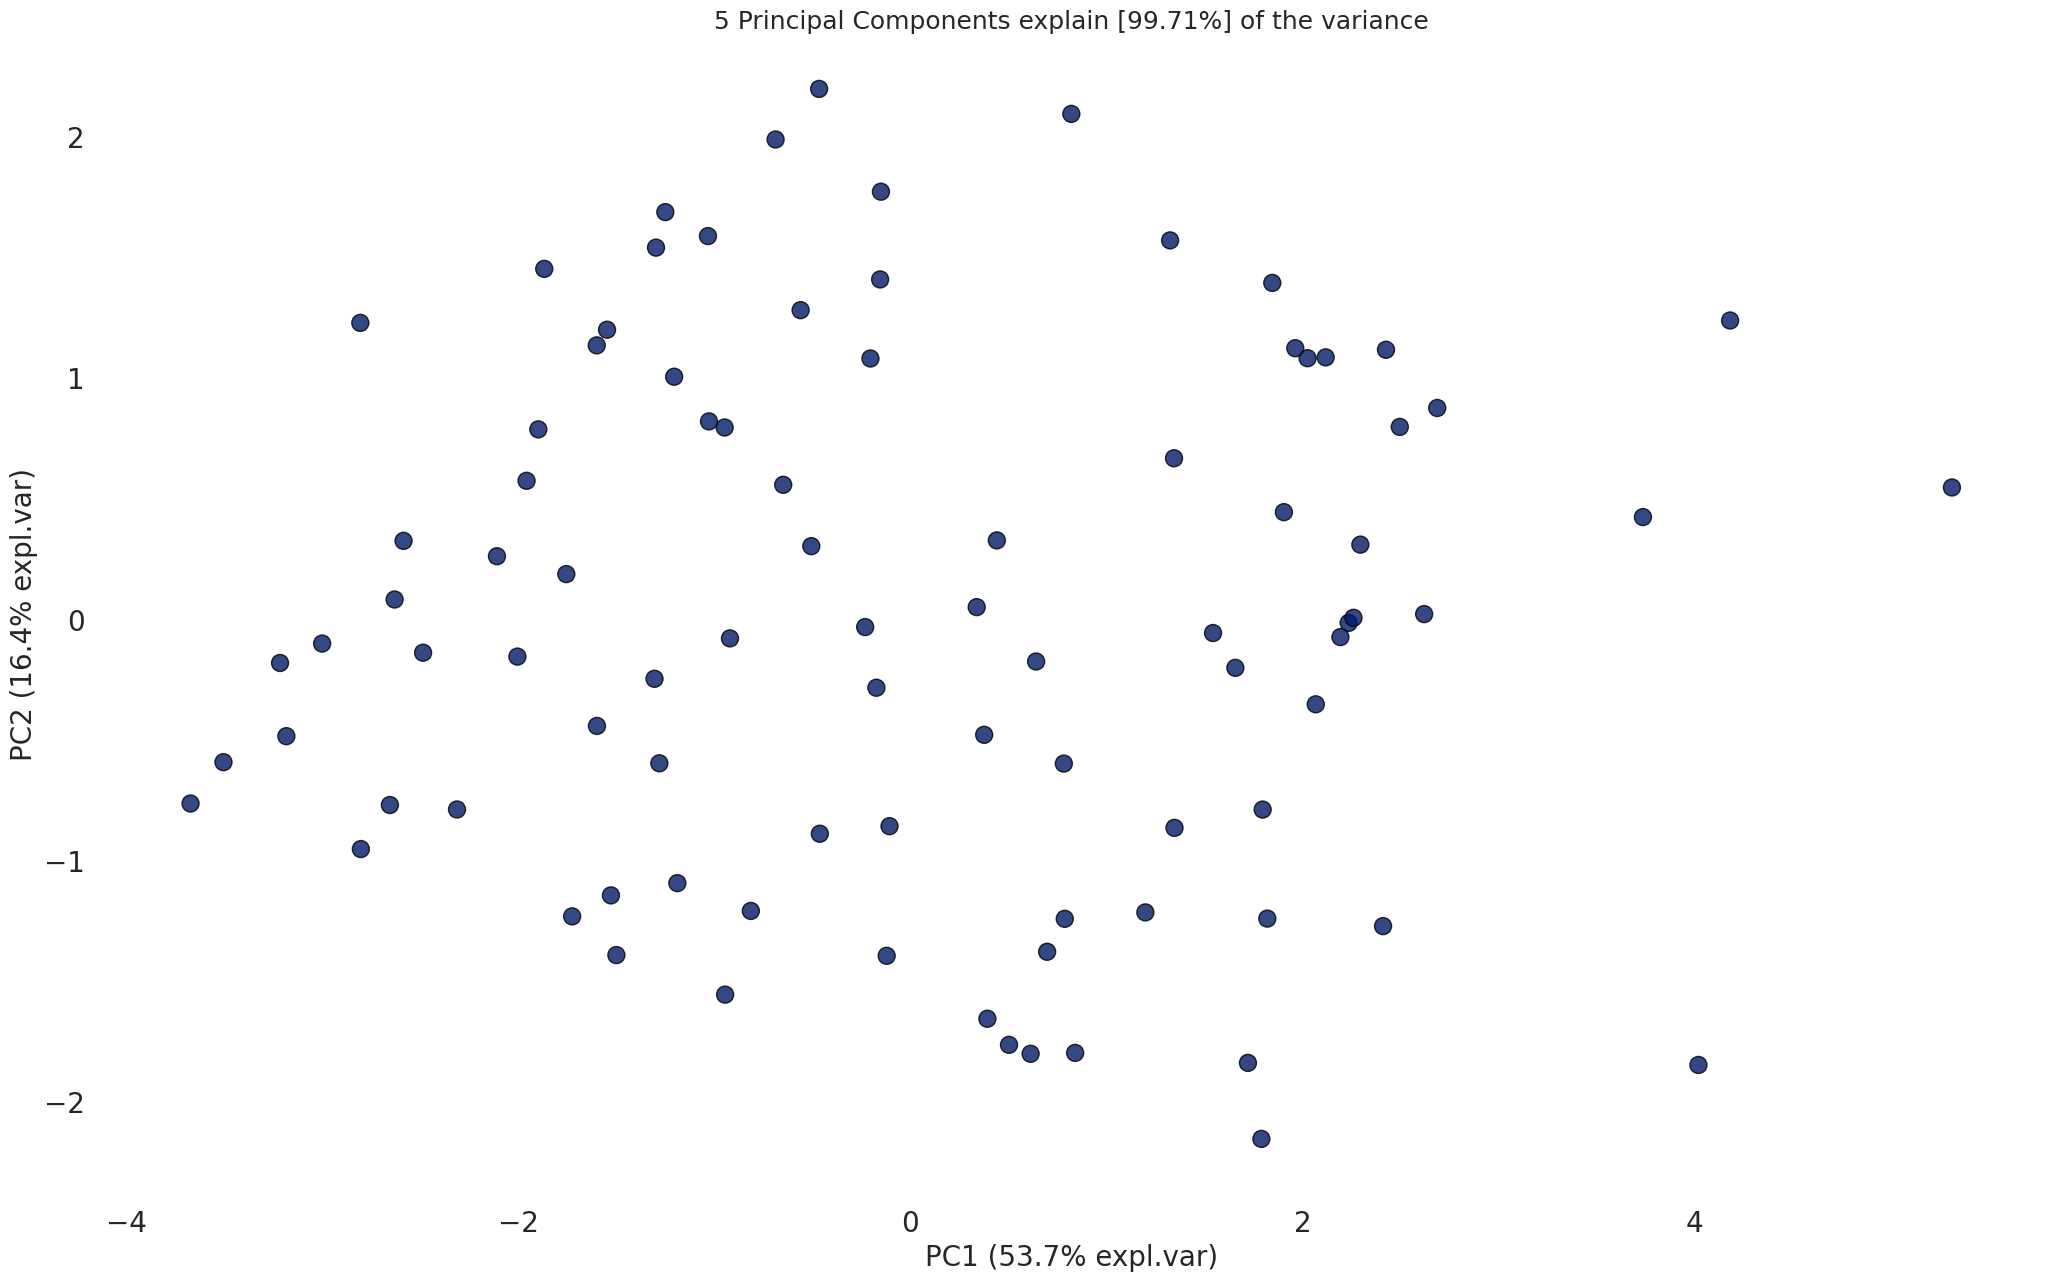

In [42]:
model.scatter(label=True, legend=False)

In [43]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4,PC5
Unnamed: 0,0.134698,0.845808,-0.015882,-0.425981,-0.006936
gravity,0.464767,0.055357,-0.102141,-0.246636,0.377558
ph,-0.169418,0.082384,0.920741,0.025270,0.334330
osmo,0.496812,-0.178679,0.103982,-0.098032,0.046173
cond,0.388240,-0.276395,0.335856,-0.379154,-0.616914
urea,0.460990,-0.142843,-0.046149,0.234575,0.487608
calc,0.356484,0.382142,0.125736,0.740728,-0.353765


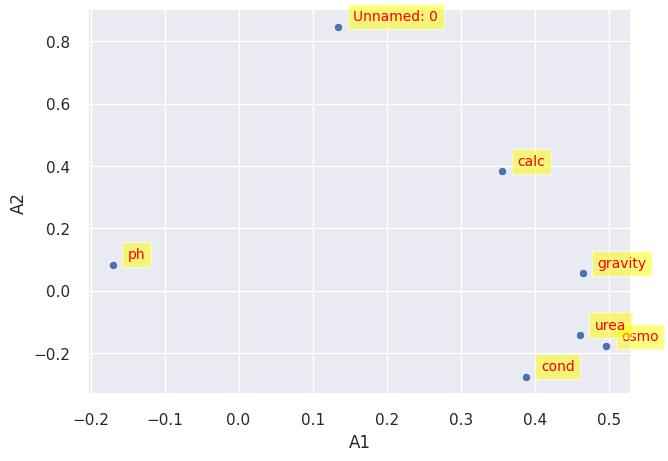

In [44]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

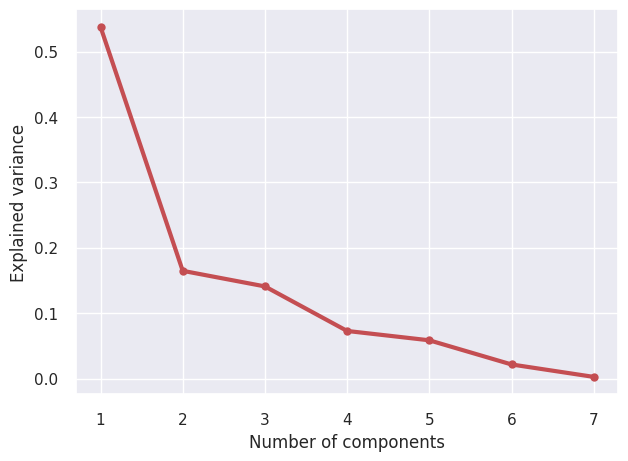

In [45]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

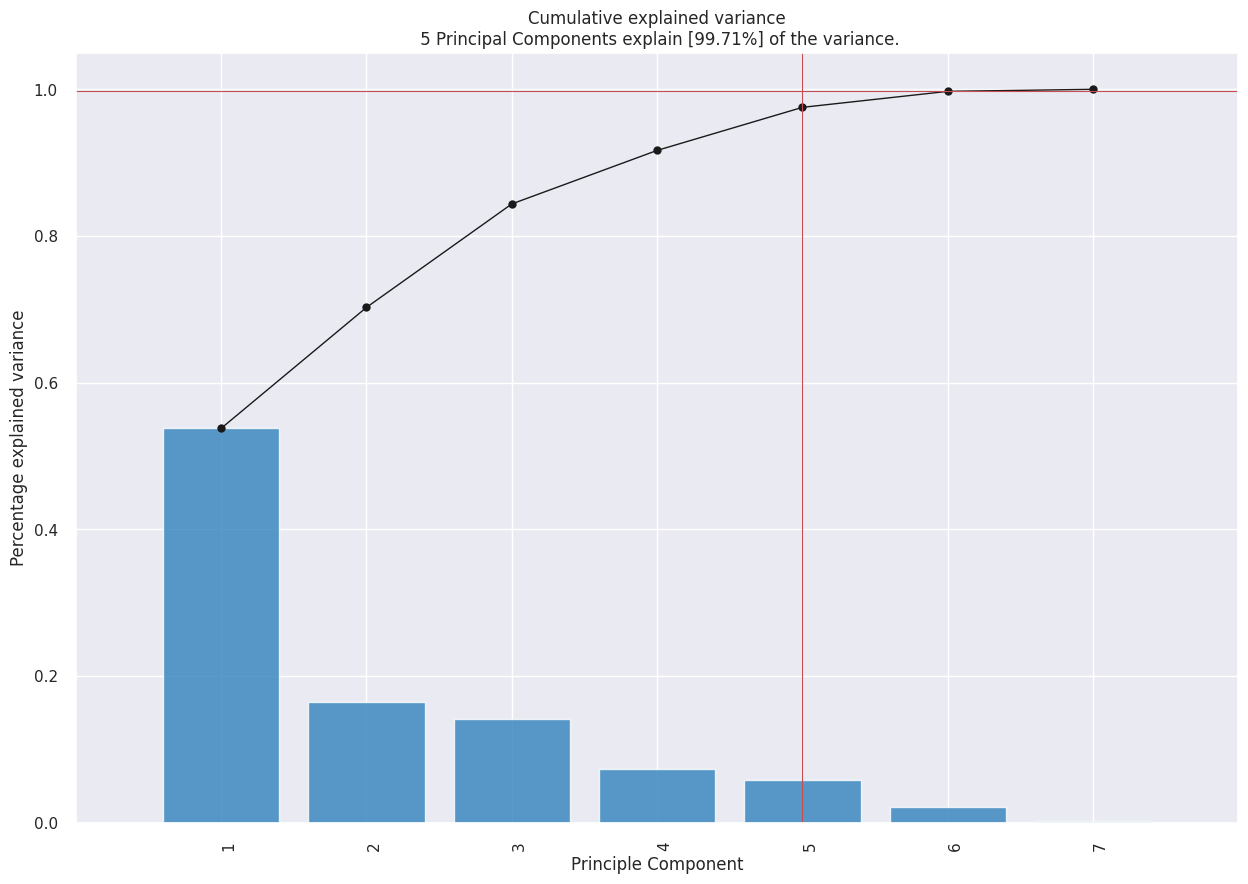

<Figure size 700x500 with 0 Axes>

In [46]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


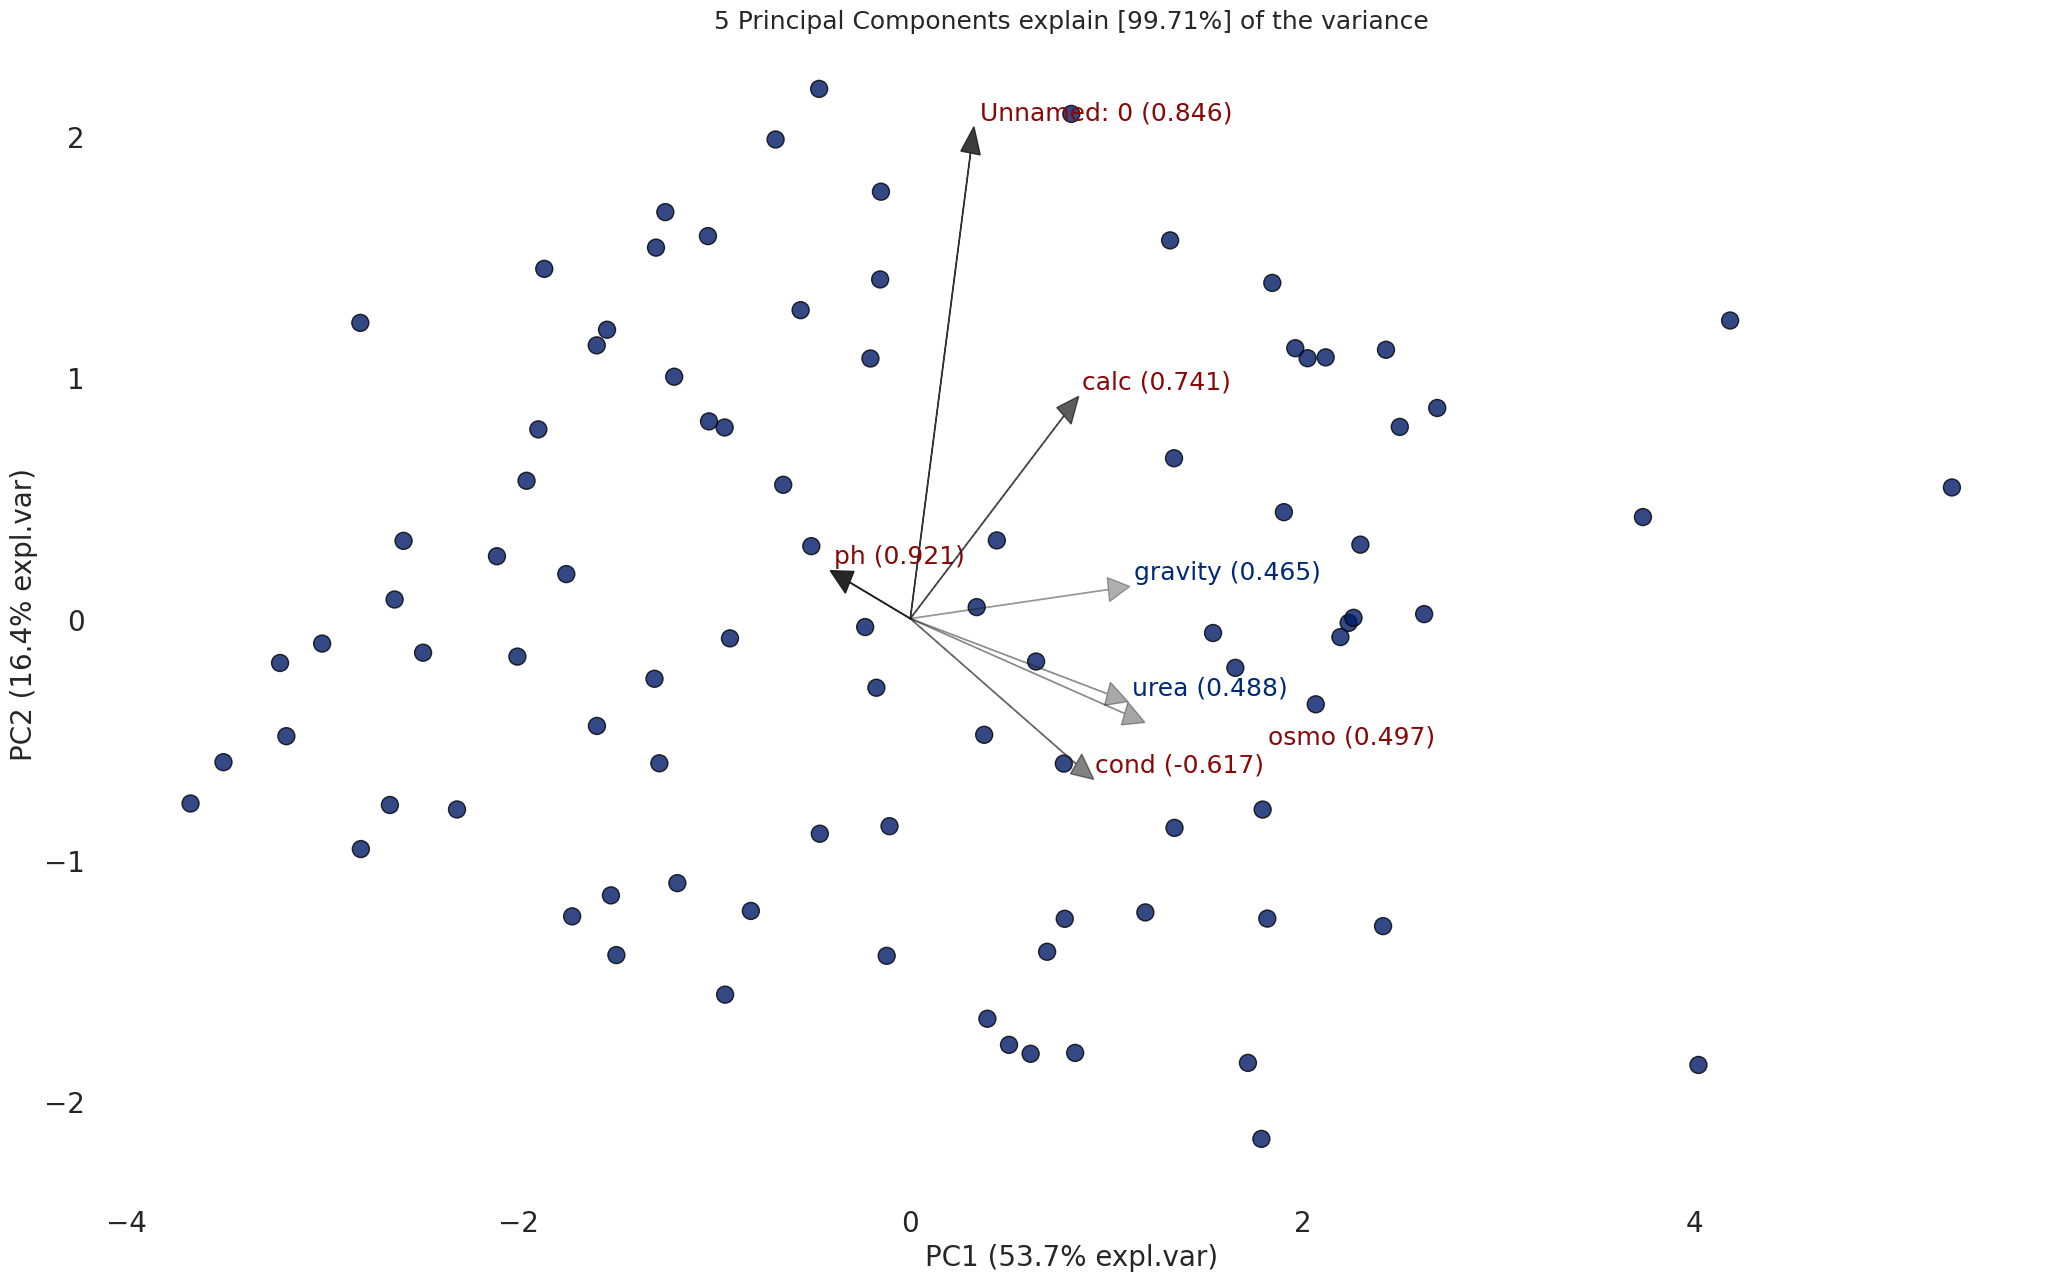

(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '5 Principal Components explain [99.71%] of the variance'}, xlabel='PC1 (53.7% expl.var)', ylabel='PC2 (16.4% expl.var)'>)

In [47]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


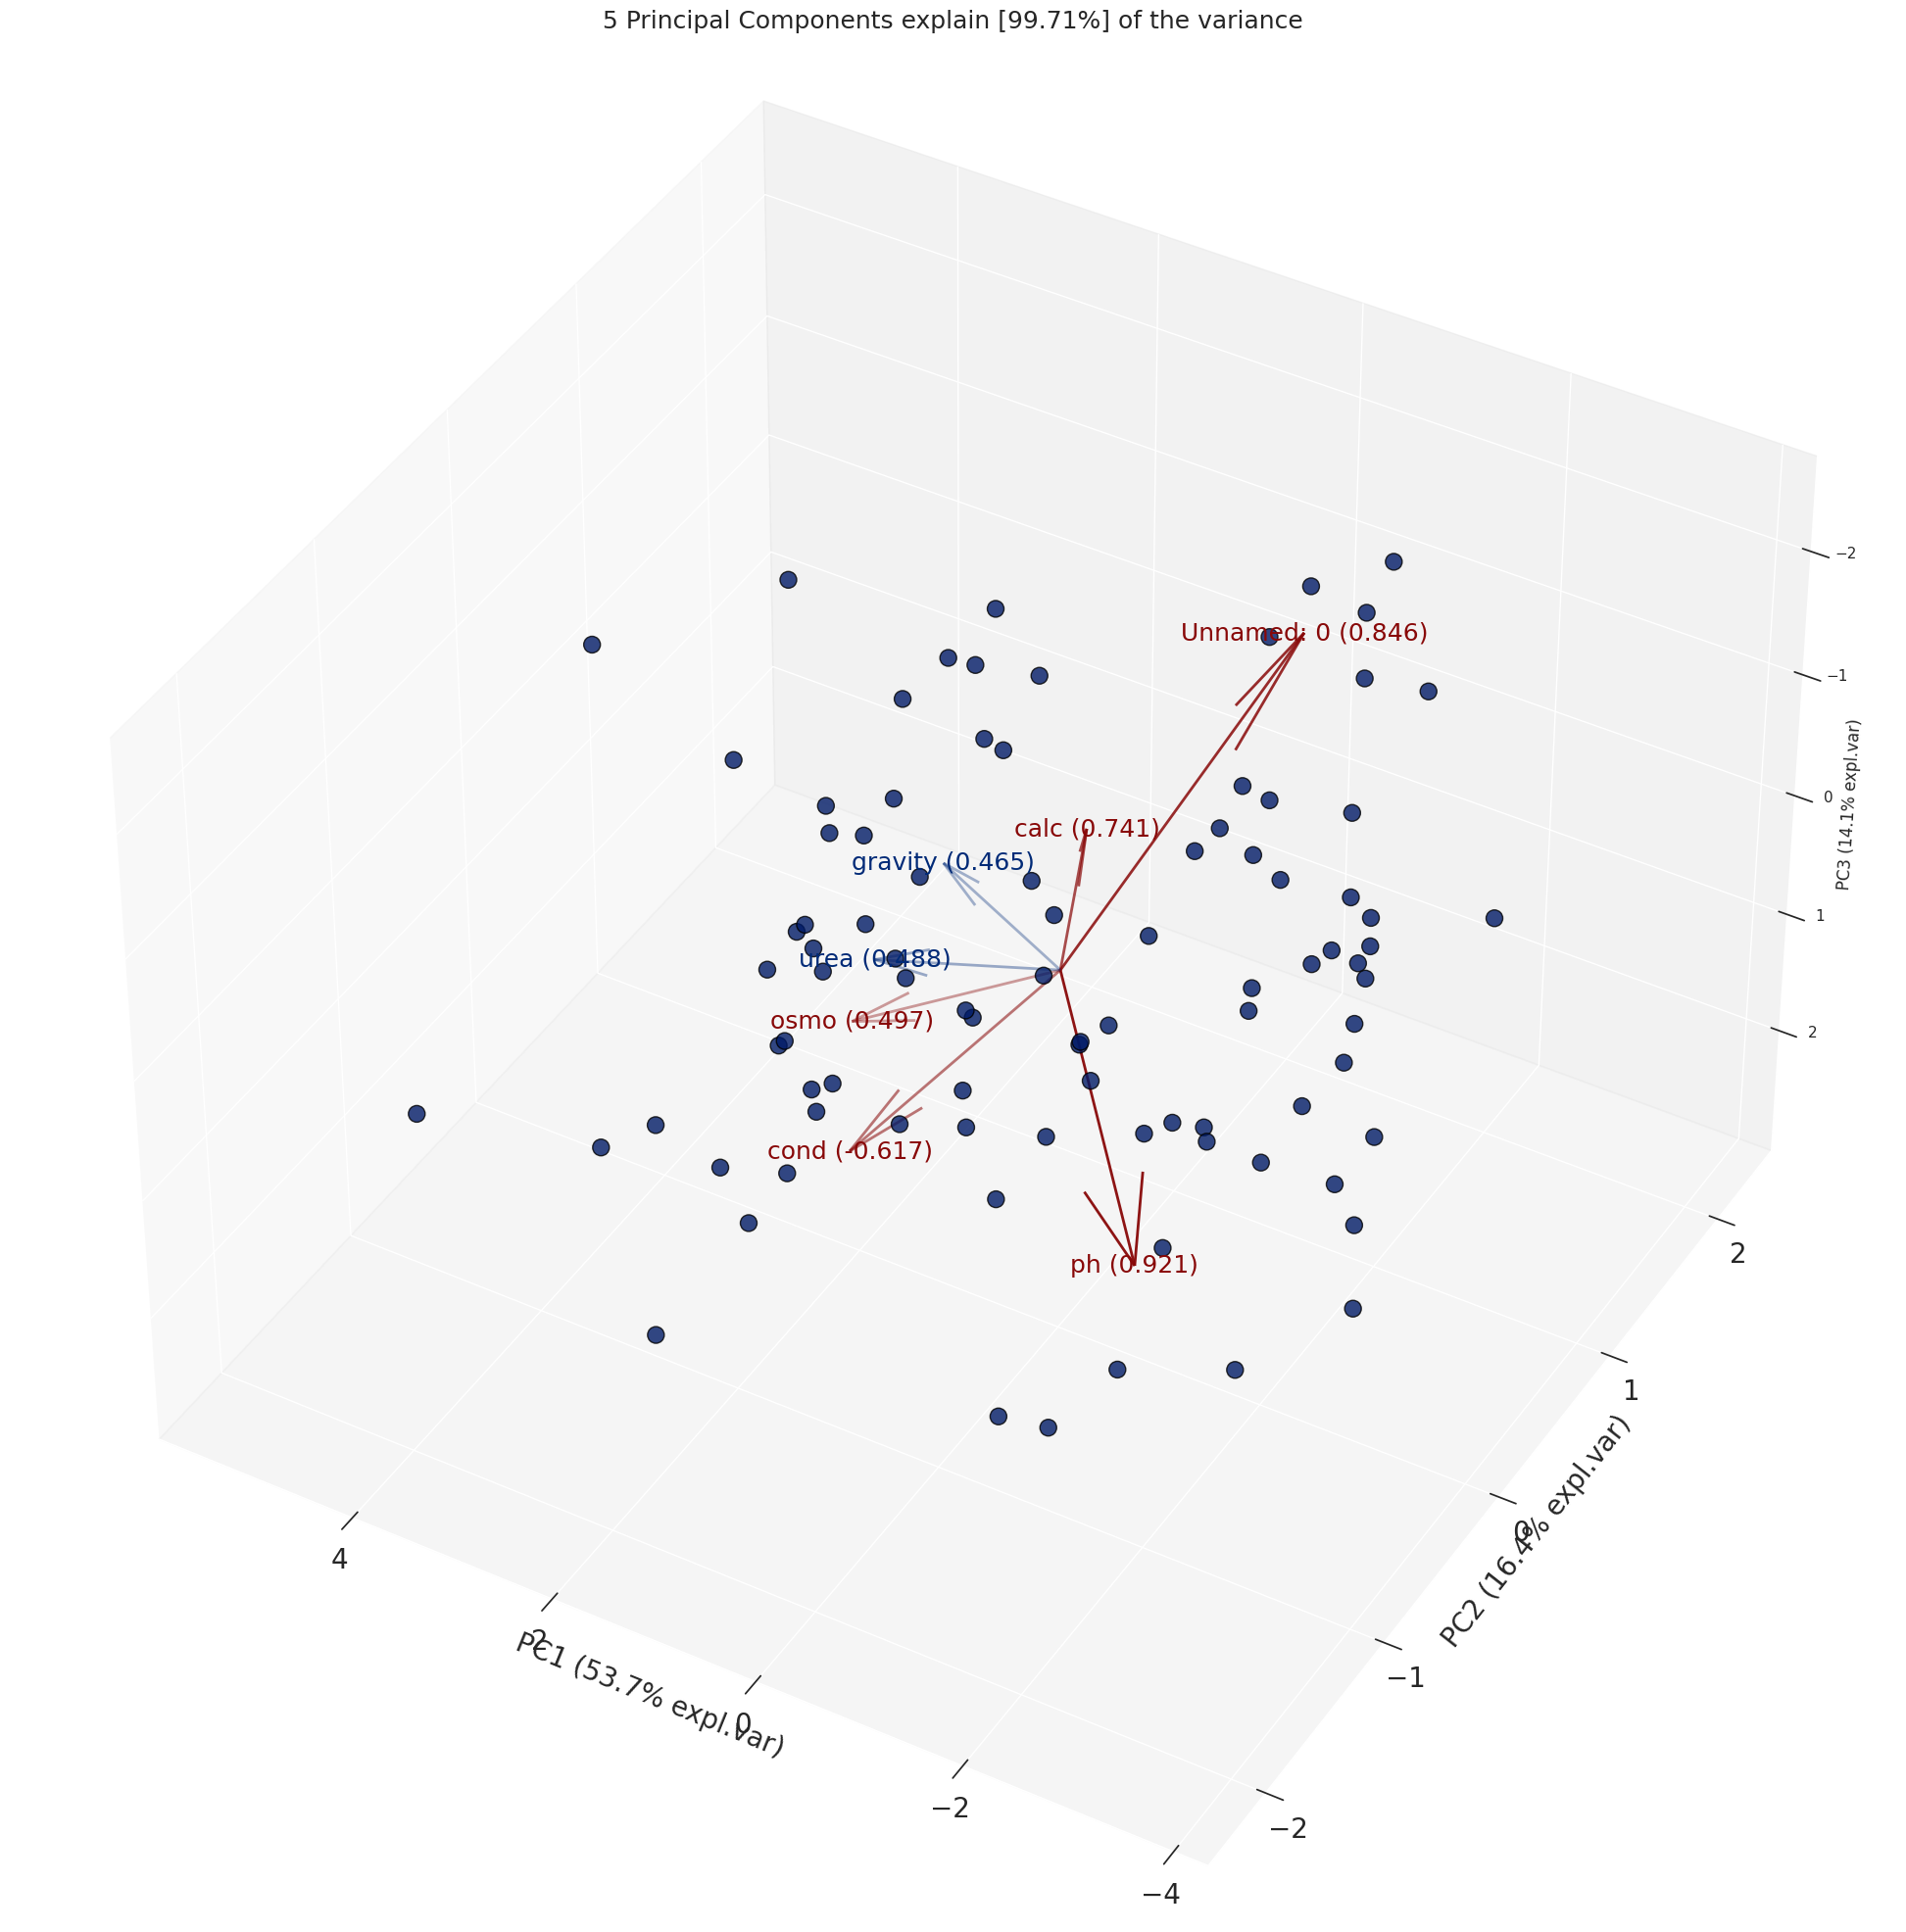

(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '5 Principal Components explain [99.71%] of the variance'}, xlabel='PC1 (53.7% expl.var)', ylabel='PC2 (16.4% expl.var)', zlabel='PC3 (14.1% expl.var)'>)

In [48]:
model.biplot3d(legend=False)

In [49]:
from pycaret.utils import version
version()

'3.0.0'

In [50]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (81, 8)
Unseen Data For Predictions: (9, 8)


In [51]:
from pycaret.classification import *
clf = setup(data=data, target='target', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(81, 8)"
4,Transformed data shape,"(81, 8)"
5,Transformed train set shape,"(56, 8)"
6,Transformed test set shape,"(25, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [54]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0810
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0990
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1630
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0620
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1340
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0720
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1080
ridge,Ridge Classifier,0.9800,0.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.0620
lda,Linear Discriminant Analysis,0.9800,1.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.0590
nb,Naive Bayes,0.9633,1.0000,0.9667,0.9750,0.9657,0.9282,0.9374,0.1030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [53]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [57]:
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

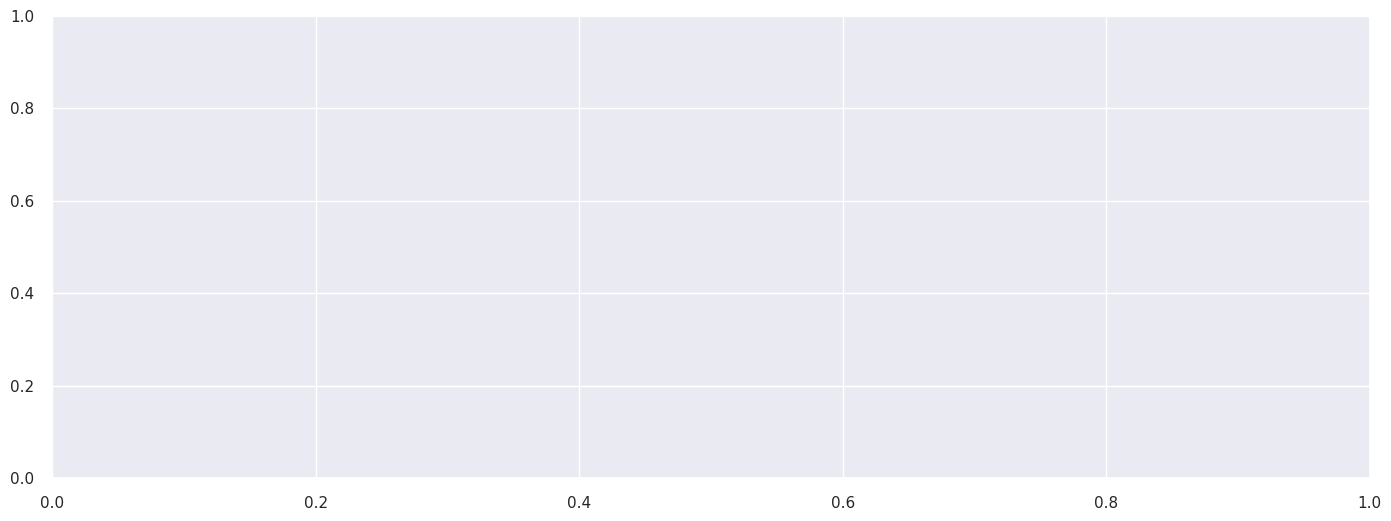

In [58]:
evaluate_model(tuned_lr)

In [59]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.7778,1.0000,0.7500,0.8571,0.6667,0.7071
1,0.5000,0.4444,0.3333,0.5000,0.4000,0.0000,0.0000
2,0.5000,0.5556,0.6667,0.5000,0.5714,0.0000,0.0000
3,0.6667,1.0000,1.0000,0.6000,0.7500,0.3333,0.4472
4,0.8333,0.9444,0.6667,1.0000,0.8000,0.6667,0.7071
5,0.1667,0.3333,0.3333,0.2500,0.2857,-0.6667,-0.7071
6,0.8000,0.8333,1.0000,0.6667,0.8000,0.6154,0.6667
7,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
8,0.8000,0.6667,1.0000,0.7500,0.8571,0.5455,0.6124


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
1,0.6667,0.5000,0.6667,0.6667,0.6667,0.3333,0.3333
2,0.5000,0.5556,0.3333,0.5000,0.4000,0.0000,0.0000
3,0.8333,0.8889,1.0000,0.7500,0.8571,0.6667,0.7071
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,0.6667,1.0000,0.6000,0.7500,0.3333,0.4472
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.6000,0.7500,0.6667,0.6667,0.6667,0.1667,0.1667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [61]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

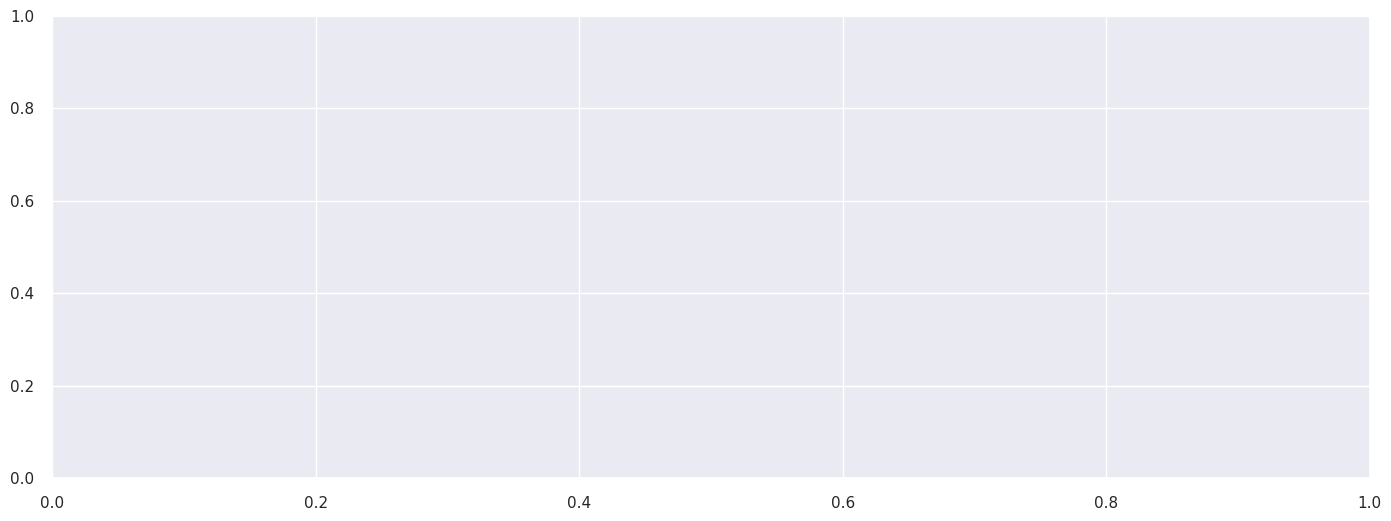

In [62]:
evaluate_model(tuned_knn)

In [63]:
qda=create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8333,1.0000,0.6667,1.0000,0.8000,0.6667,0.7071
2,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8333,1.0000,0.6667,1.0000,0.8000,0.6667,0.7071
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [64]:
tuned_qda=tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [65]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

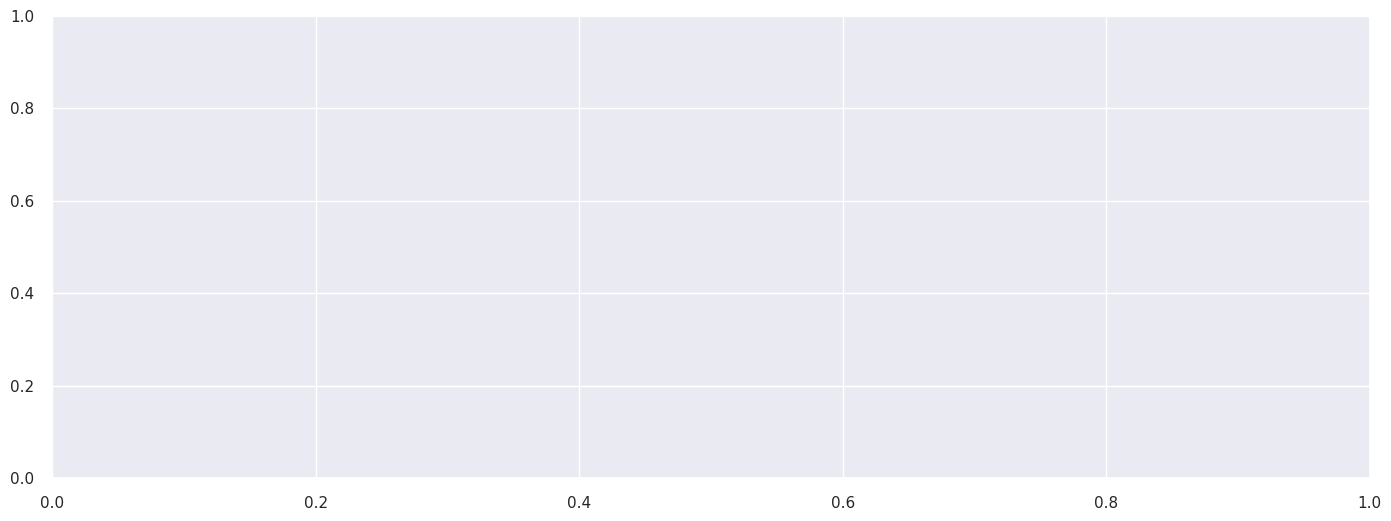

In [66]:
evaluate_model(tuned_qda)

In [67]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
clf_pca = setup(data=data, target='target', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(81, 8)"
4,Transformed data shape,"(81, 4)"
5,Transformed train set shape,"(56, 4)"
6,Transformed test set shape,"(25, 4)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [69]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9800,1.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.0840
ridge,Ridge Classifier,0.9800,0.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.1270
qda,Quadratic Discriminant Analysis,0.9800,1.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.0840
lda,Linear Discriminant Analysis,0.9800,1.0000,0.9667,1.0000,0.9800,0.9615,0.9667,0.0910
rf,Random Forest Classifier,0.9633,1.0000,0.9333,1.0000,0.9600,0.9282,0.9374,0.2870
knn,K Neighbors Classifier,0.9433,0.9778,0.9333,0.9667,0.9400,0.8897,0.9040,0.0910
svm,SVM - Linear Kernel,0.9433,0.0000,0.9333,0.9667,0.9400,0.8897,0.9040,0.1020
gbc,Gradient Boosting Classifier,0.9300,0.9667,0.9333,0.9500,0.9314,0.8615,0.8788,0.3170
et,Extra Trees Classifier,0.9300,1.0000,0.9000,0.9750,0.9157,0.8615,0.8821,0.3330
ada,Ada Boost Classifier,0.9233,0.9667,0.8833,0.9500,0.9100,0.8449,0.8540,0.3120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [70]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

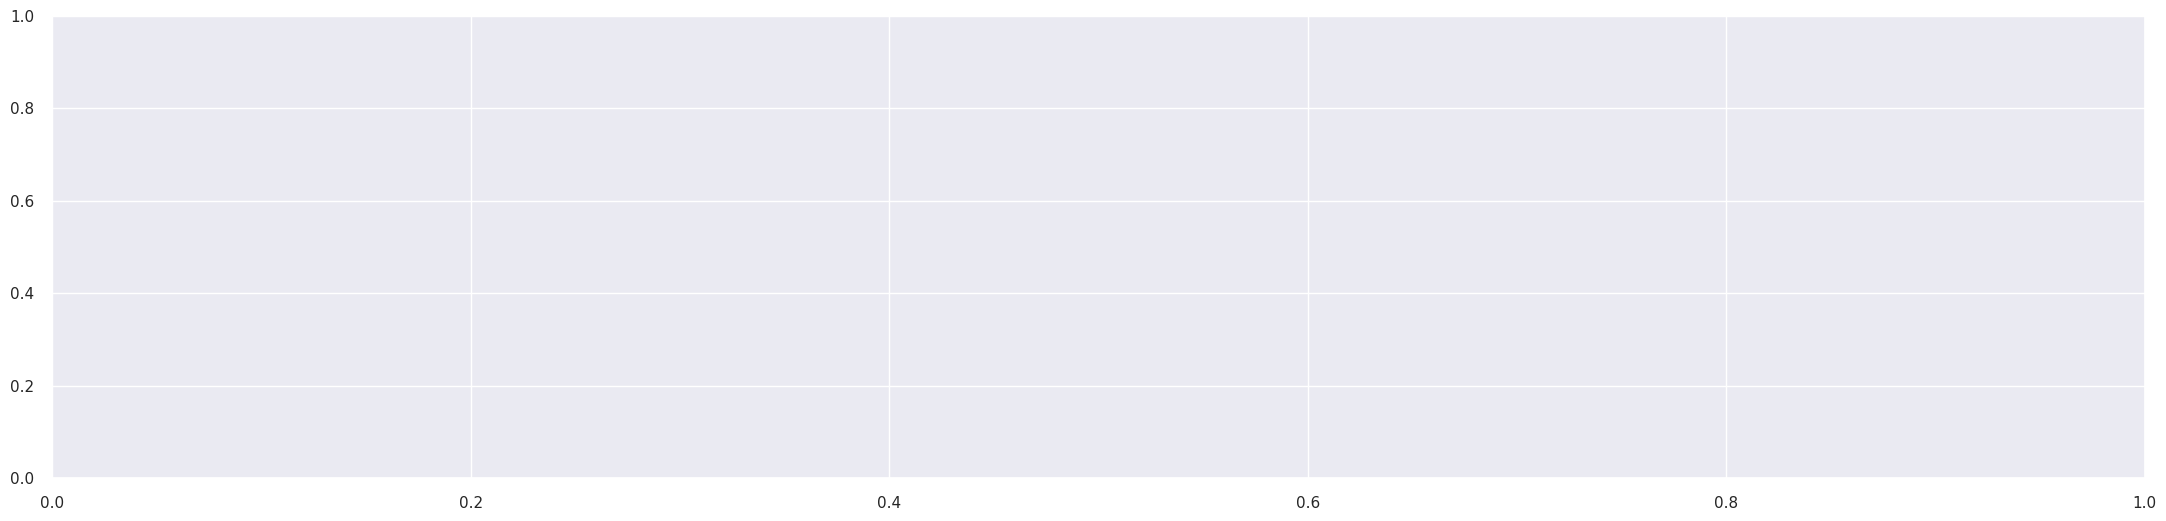

In [72]:
evaluate_model(tuned_best_model_pca)

In [73]:
lr_pca = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [74]:
tuned_lr_pca = tune_model(lr_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [75]:
tuned_lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

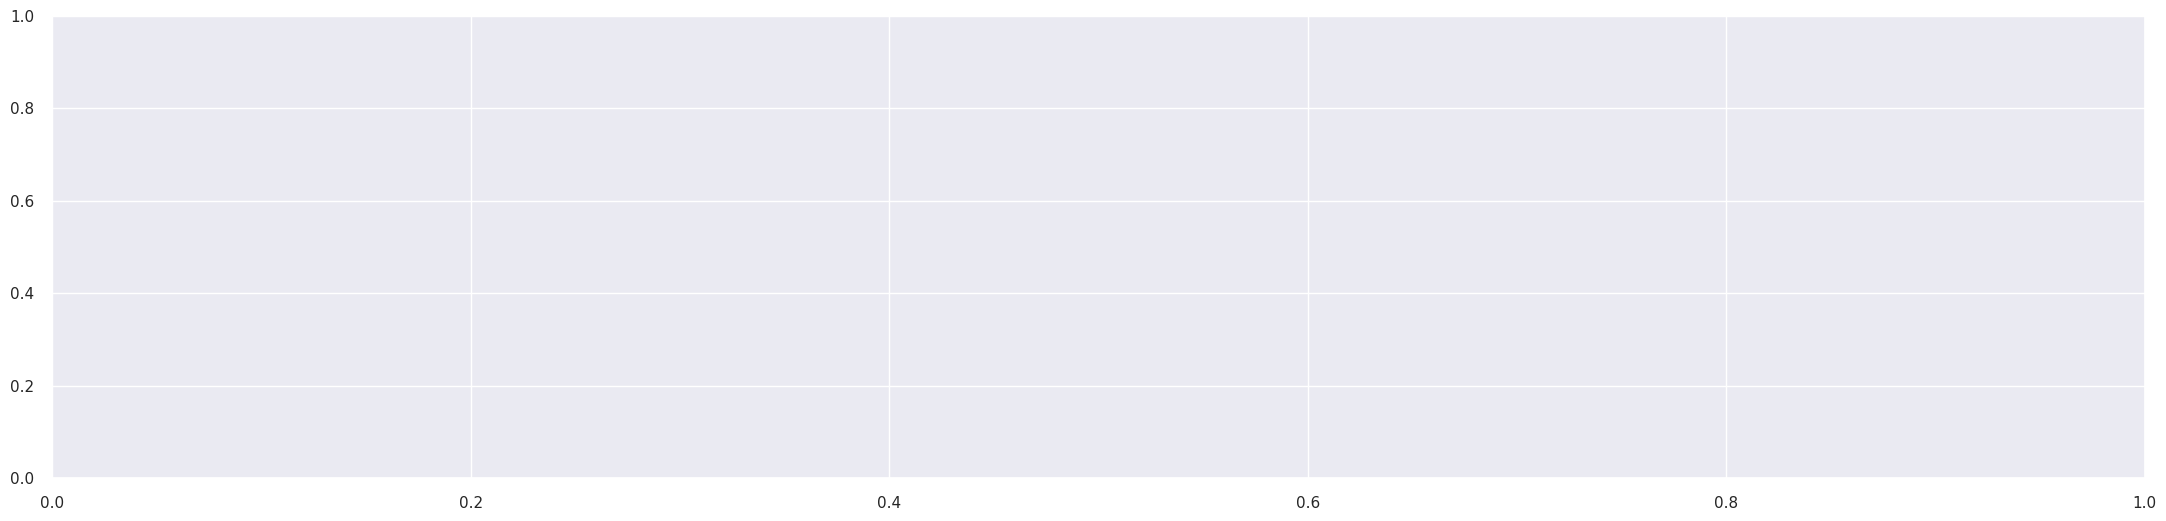

In [76]:
evaluate_model(tuned_lr_pca)

In [77]:
knn_pca = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8333,0.9444,0.6667,1.0000,0.8000,0.6667,0.7071
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,1.0000,1.0000,0.6667,0.8000,0.6154,0.6667
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [78]:
tuned_knn_pca = tune_model(knn_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.6667,0.8889,0.6667,0.6667,0.6667,0.3333,0.3333
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [79]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

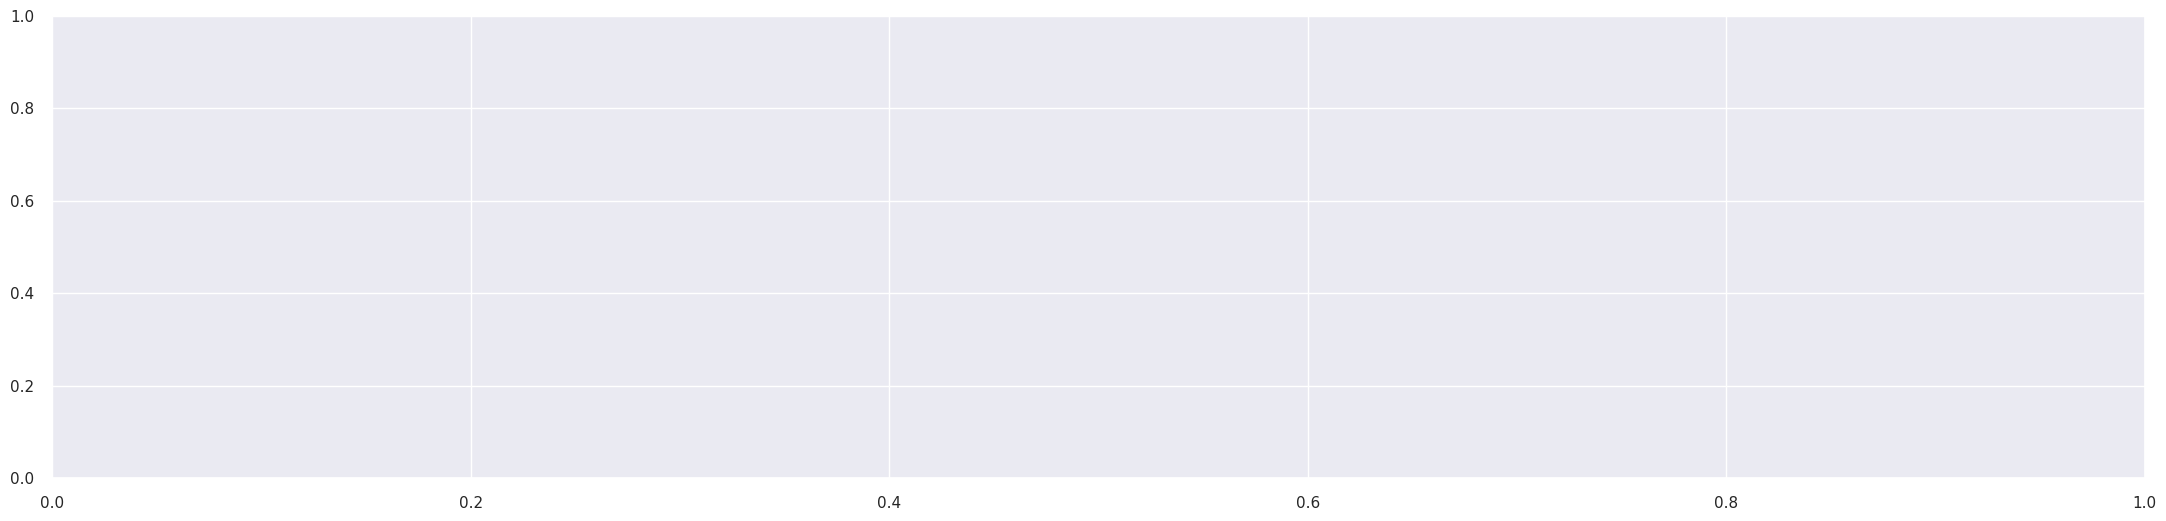

In [80]:
evaluate_model(tuned_knn_pca)

In [81]:
qda_pca = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [82]:
tuned_qda_pca = tune_model(qda_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [83]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

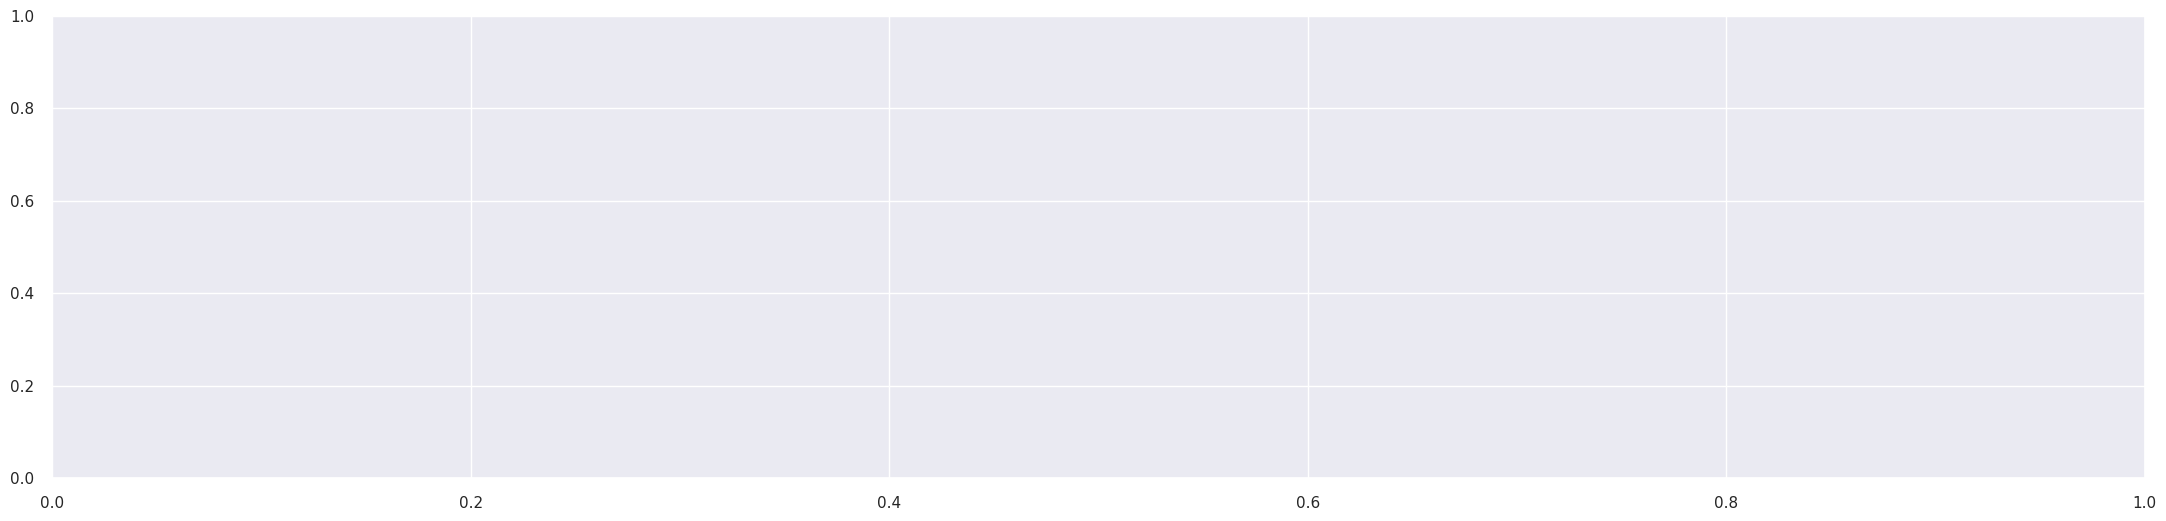

In [84]:
evaluate_model(tuned_qda_pca)

In [85]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,1.0000,0.3333,1.0000,0.5000,0.3333,0.4472
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8333,1.0000,1.0000,0.7500,0.8571,0.6667,0.7071
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [86]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [87]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_samples_leaf=6, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

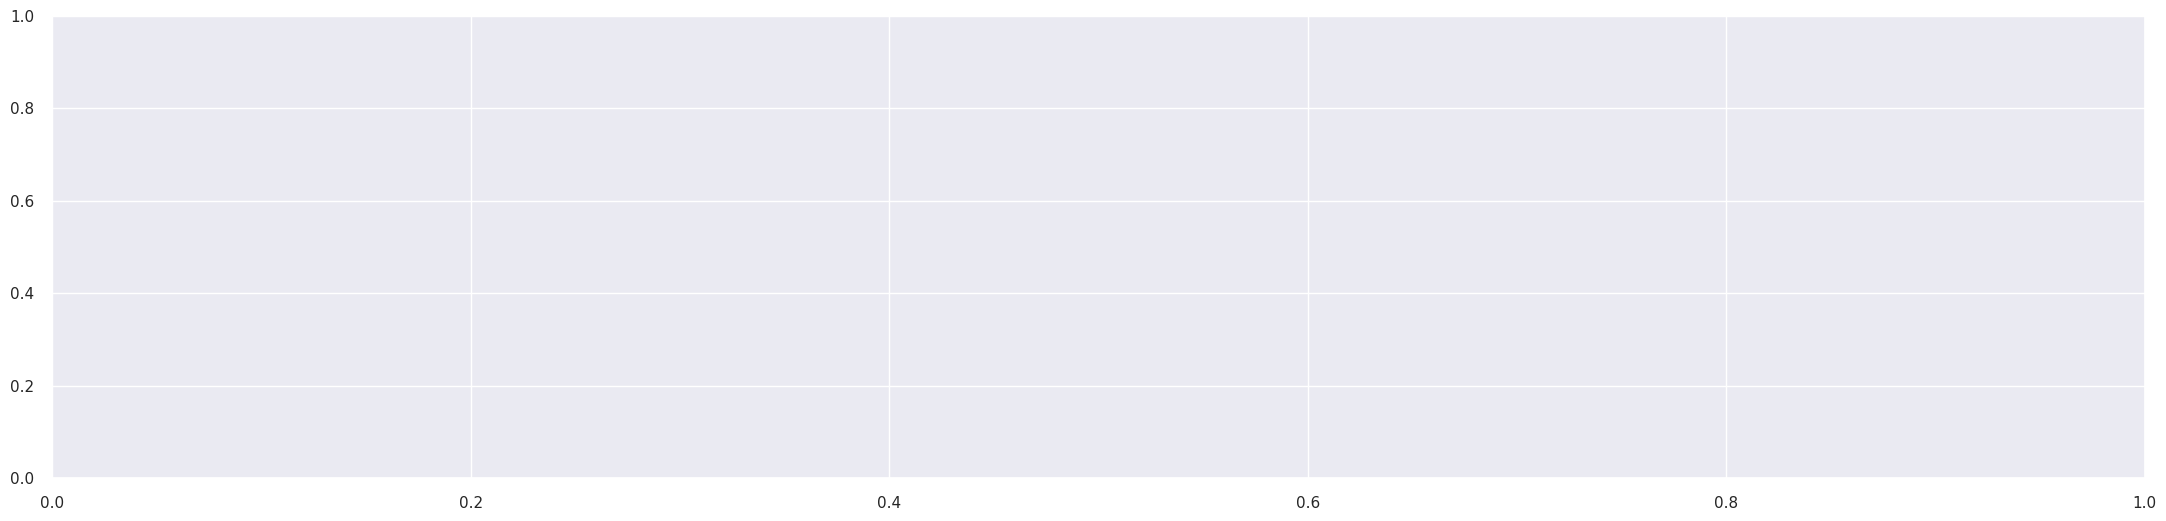

In [88]:
evaluate_model(tuned_et_pca)

In [89]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import shap